In [22]:
#라이브러리 import

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, plot_confusion_matrix, classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#데이터 불러오기

data = pd.read_csv('/content/drive/MyDrive/kmong/credit_approval/application_record.csv', encoding = 'utf-8') 
record = pd.read_csv('/content/drive/MyDrive/kmong/credit_approval/credit_record.csv', encoding = 'utf-8')  

In [4]:
new_data = data

In [5]:
#null값이 많은 행인 occupation_type 삭제
new_data.drop('OCCUPATION_TYPE', axis=1, inplace=True) 

In [6]:
print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [7]:
record['STATUS'].value_counts() 

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [8]:
#STATUS 값이 1 이상이면 새로운 변수 dep_value값에 Yes
record['dep_value'] = None
record['dep_value'][record['STATUS'] =='1']='Yes' 
record['dep_value'][record['STATUS'] =='2']='Yes' 
record['dep_value'][record['STATUS'] =='3']='Yes' 
record['dep_value'][record['STATUS'] =='4']='Yes' 
record['dep_value'][record['STATUS'] =='5']='Yes' 

In [9]:
#dep_value값이 No이면 0, yes이면 1 인 새로운 변수 target 생성

cpunt=record.groupby('ID').count()
cpunt['dep_value'][cpunt['dep_value'] > 0]='Yes' 
cpunt['dep_value'][cpunt['dep_value'] == 0]='No' 
cpunt = cpunt[['dep_value']]
new_data=pd.merge(new_data,cpunt,how='inner',on='ID')
new_data['target']=new_data['dep_value']
new_data.loc[new_data['target']=='Yes','target']=1
new_data.loc[new_data['target']=='No','target']=0

In [10]:
print(cpunt['dep_value'].value_counts())
cpunt['dep_value'].value_counts(normalize=True)

No     40635
Yes     5350
Name: dep_value, dtype: int64


No     0.883658
Yes    0.116342
Name: dep_value, dtype: float64

In [11]:
#변수이름 간단하게 변경
new_data.rename(columns={'CODE_GENDER':'Gender','FLAG_OWN_CAR':'Car','FLAG_OWN_REALTY':'Reality',
                         'CNT_CHILDREN':'ChldNo','AMT_INCOME_TOTAL':'inc',
                         'NAME_EDUCATION_TYPE':'edutp','NAME_FAMILY_STATUS':'famtp',
                        'NAME_HOUSING_TYPE':'houtp','FLAG_EMAIL':'email',
                         'NAME_INCOME_TYPE':'inctp','FLAG_WORK_PHONE':'wkphone',
                         'FLAG_PHONE':'phone','CNT_FAM_MEMBERS':'famsize',
                        'OCCUPATION_TYPE':'occyp'
                        },inplace=True)

In [12]:
#null값 제거
new_data.dropna()
new_data = new_data.mask(new_data == 'NULL').dropna()

In [13]:
print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             36457 non-null  int64  
 1   Gender         36457 non-null  object 
 2   Car            36457 non-null  object 
 3   Reality        36457 non-null  object 
 4   ChldNo         36457 non-null  int64  
 5   inc            36457 non-null  float64
 6   inctp          36457 non-null  object 
 7   edutp          36457 non-null  object 
 8   famtp          36457 non-null  object 
 9   houtp          36457 non-null  object 
 10  DAYS_BIRTH     36457 non-null  int64  
 11  DAYS_EMPLOYED  36457 non-null  int64  
 12  FLAG_MOBIL     36457 non-null  int64  
 13  wkphone        36457 non-null  int64  
 14  phone          36457 non-null  int64  
 15  email          36457 non-null  int64  
 16  famsize        36457 non-null  float64
 17  dep_value      36457 non-null  object 
 18  target

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
lab=LabelEncoder()

In [16]:
#객체형 변수를 정수형으로 변경

new_data['Gender']=lab.fit_transform(new_data['Gender'])
new_data['Car']=lab.fit_transform(new_data['Car'])
new_data['Reality']=lab.fit_transform(new_data['Reality'])
new_data['inctp']=lab.fit_transform(new_data['inctp'])
new_data['edutp']=lab.fit_transform(new_data['edutp'])
new_data['famtp']=lab.fit_transform(new_data['famtp'])
new_data['houtp']=lab.fit_transform(new_data['houtp'])
new_data['dep_value']=lab.fit_transform(new_data['dep_value'])
new_data['target']=lab.fit_transform(new_data['target'])

In [17]:
print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             36457 non-null  int64  
 1   Gender         36457 non-null  int64  
 2   Car            36457 non-null  int64  
 3   Reality        36457 non-null  int64  
 4   ChldNo         36457 non-null  int64  
 5   inc            36457 non-null  float64
 6   inctp          36457 non-null  int64  
 7   edutp          36457 non-null  int64  
 8   famtp          36457 non-null  int64  
 9   houtp          36457 non-null  int64  
 10  DAYS_BIRTH     36457 non-null  int64  
 11  DAYS_EMPLOYED  36457 non-null  int64  
 12  FLAG_MOBIL     36457 non-null  int64  
 13  wkphone        36457 non-null  int64  
 14  phone          36457 non-null  int64  
 15  email          36457 non-null  int64  
 16  famsize        36457 non-null  float64
 17  dep_value      36457 non-null  int64  
 18  target

In [18]:
#데이터를 X,y로 나누고 train,test로 split

features = new_data.drop(['target','dep_value','ID'], axis=1)
target = ['target']

# Split into test and train
X = features
y = new_data[target].to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
                                                    random_state = 1006)

# 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [24]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC_AUC = {}".format(roc_auc))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, roc_auc

ROC_AUC = 0.5
              precision    recall  f1-score   support

           0    0.87950   1.00000   0.93589      9620
           1    0.00000   0.00000   0.00000      1318

    accuracy                        0.87950     10938
   macro avg    0.43975   0.50000   0.46794     10938
weighted avg    0.77352   0.87950   0.82312     10938



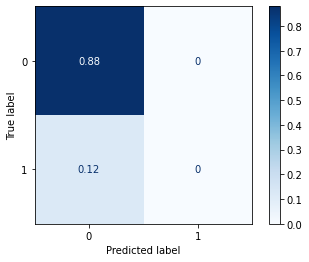

In [25]:
#LogisticRegression 모델을 이용해 학습

model = LogisticRegression(C=0.8,
                           random_state=0,
                           solver='lbfgs')

model, roc_auc = run_model(model, X_train, y_train, X_test, y_test)


ROC_AUC = 0.5066248868221555
              precision    recall  f1-score   support

           0    0.88093   0.98669   0.93082      9620
           1    0.21472   0.02656   0.04727      1318

    accuracy                        0.87100     10938
   macro avg    0.54783   0.50662   0.48904     10938
weighted avg    0.80065   0.87100   0.82435     10938



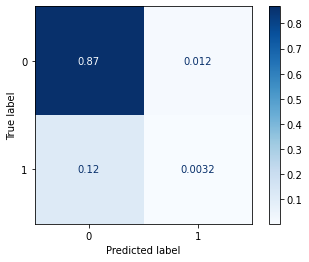

In [26]:
#DecisionTreeClassifier 모델을 이용해 학습

model = DecisionTreeClassifier(max_depth=12,
                               min_samples_split=8,
                               random_state=1024)
model, roc_auc = run_model(model, X_train, y_train, X_test, y_test)

ROC_AUC = 0.5
              precision    recall  f1-score   support

           0    0.87950   1.00000   0.93589      9620
           1    0.00000   0.00000   0.00000      1318

    accuracy                        0.87950     10938
   macro avg    0.43975   0.50000   0.46794     10938
weighted avg    0.77352   0.87950   0.82312     10938



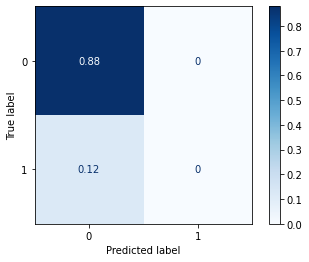

In [27]:
#RandomForestClassifier 모델을 이용해 학습

model = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16
                              )
model, roc_auc = run_model(model, X_train, y_train, X_test, y_test)

ROC_AUC = 0.5
              precision    recall  f1-score   support

           0    0.87950   1.00000   0.93589      9620
           1    0.00000   0.00000   0.00000      1318

    accuracy                        0.87950     10938
   macro avg    0.43975   0.50000   0.46794     10938
weighted avg    0.77352   0.87950   0.82312     10938



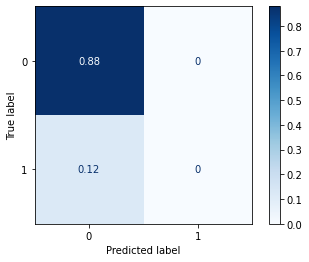

In [28]:
#svm 모델을 이용해 학습

model = svm.SVC(C = 0.8,
                kernel='linear')
model, roc_auc = run_model(model, X_train, y_train, X_test, y_test)